<a href="https://colab.research.google.com/github/murilo-henrique060/matematica-computacional/blob/main/Atividade%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [338]:
class Plot():
  def __init__(self, figsize : Tuple[int, int] = (6, 6), axis : Tuple[int, int, int, int] = (-5, 5, -5, 5)) -> Plot:
    """
    Initializes a Plot object

    Args:
        figsize (int, int): Dimentions of the image generated by the plot
        axis (int, int, int, int): Horizontal and Vertical intervals that will be shown in the plot

    Returns:
        Plot: A plot object
    """
    self.fig, self.ax = plt.subplots(figsize=figsize)

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)

    plt.axis(axis)
    plt.xticks(range(int(axis[0]), int(axis[1])+1))
    plt.yticks(range(int(axis[2]), int(axis[3])+1))

  def show(self) -> None:
    """
    Generates a image of the plot

    Args:

    Returns:
      None
    """
    plt.show()

In [339]:
class PlotObject():
  def __init__(self, plot: Plot, *args, **kwargs):
    """
    Initializes a PlotObject

    Args:
      plot (Plot): Plot that the object will be draw

    Returns:
      PlotObject: A PlotObject instance
    """
    self.plot = plot
    self.line = plot.ax.plot(*args, **kwargs)

class Point(PlotObject):
  @staticmethod
  def points(plot, coords : List[Tuple[float, float]], **kwargs) -> List[Point]:
    """
    Generates a list of Point objects from a list of coordinates

    Args:
      coords (List[Tuple[float, float]]): list of coordinates
      kwargs: Point initialization parameters
    """
    return list(map(lambda c: Point(plot, c, **kwargs), coords))

  def __init__(self, plot, coords: Tuple[float, float], color='green', marker='o', **kwargs):
    """
    Initializes a Point object

    Args:
      plot (Plot): Plot that the point will be draw

    Returns:
      None
    """
    super().__init__(plot, coords[0], coords[1], color=color, marker=marker, **kwargs)

class Path(PlotObject):
  def __init__(self, plot: Plot, coords: List[Tuple[int, int]], color='blue', **kwargs):
    xcoords = []
    ycoords = []

    for c in coords:
      xcoords.append(c[0])
      ycoords.append(c[1])

    super().__init__(plot, xcoords, ycoords, color=color, **kwargs)

class FunctionPath(Path):
  def __init__(self, plot, function, samples=None, **kwargs):
    samples =  10 * int(plot.fig.get_figwidth()) if samples is None else samples
    x_axis = plot.ax.get_xlim()
    start = int(x_axis[0])
    step = (int(x_axis[1]) - start) / (samples - 1)

    coords = []
    for i in range(samples):
      x = start + step * i
      y = function(x)

      coords.append((x, y))

    super().__init__(plot, coords, **kwargs)

class LinePath(FunctionPath):
  def __init__(self, plot, function, **kwargs):
    super().__init__(plot, function, 2)

0
0


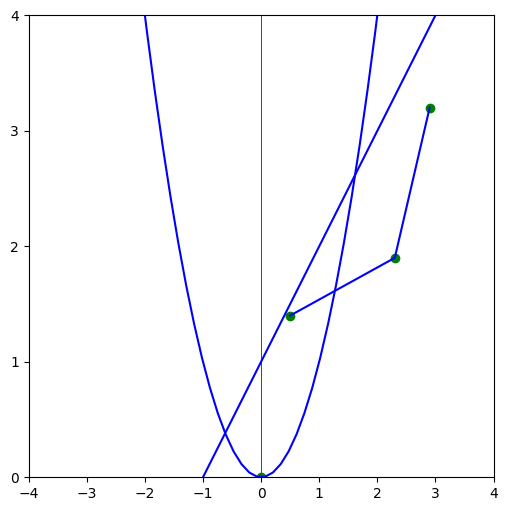

In [340]:
DATA = [
  (0.5, 1.4),
  (2.3, 1.9),
  (2.9, 3.2)
]

plot = Plot(axis=(-4, 4, 0, 4))
p = Point(plot, (-1, 1))
Point.points(plot, DATA)
Path(plot, DATA)
FunctionPath(plot, lambda x: x**2)
LinePath(plot, lambda x: x + 1)

plot.show()